In [1]:
import tensorflow as tf

In [5]:
tf.__version__

'2.9.1'

In [6]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [7]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [8]:
len(X_train)

60000

In [9]:
len(X_test)

10000

In [10]:
X_train[0].shape

(28, 28)

In [11]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

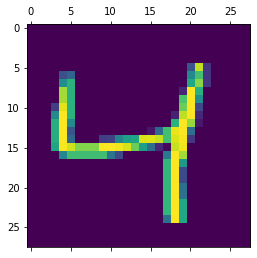

In [12]:
plt.matshow(X_train[2])

In [13]:
y_train[2]

4

In [14]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [15]:
X_train.shape

(60000, 28, 28)

In [16]:
# scalling the data
X_train = X_train/255
X_test = X_test/255

In [17]:
# (60000,28*28)
X_train_flattened = X_train.reshape(len(X_train),28*28)
print(X_train_flattened)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [18]:
X_train_flattened.shape

(60000, 784)

In [19]:
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [20]:
X_test_flattened.shape

(10000, 784)

In [21]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [24]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)


Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4671 - accuracy: 0.8775
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3036 - accuracy: 0.9156
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2834 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2731 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2663 - accuracy: 0.9255


In [25]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2694 - accuracy: 0.9251


[0.2693622410297394, 0.9251000285148621]

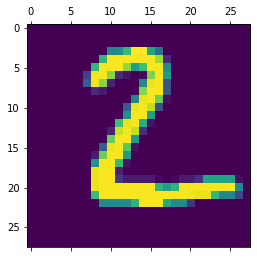

In [26]:
plt.matshow(X_test[1])

In [27]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [28]:
y_predicted[1]

array([4.9102804e-01, 5.6446856e-03, 9.9933535e-01, 3.8050595e-01,
       8.0480267e-10, 7.7740502e-01, 8.5948575e-01, 1.3657585e-12,
       1.4777535e-01, 2.7035485e-09], dtype=float32)

In [29]:
np.argmax(y_predicted[1])

2

In [30]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [31]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [32]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 960,    0,    1,    2,    0,    5,    7,    3,    2,    0],
       [   0, 1109,    3,    2,    0,    1,    4,    2,   14,    0],
       [   3,   10,  920,   18,    8,    2,   12,   11,   45,    3],
       [   3,    0,   18,  931,    0,   12,    2,   14,   25,    5],
       [   1,    1,    4,    1,  913,    0,   10,    5,   10,   37],
       [  11,    2,    3,   47,   11,  749,   15,   10,   38,    6],
       [   9,    3,    8,    1,    8,   10,  914,    2,    3,    0],
       [   1,    5,   21,    6,    4,    0,    0,  965,    4,   22],
       [   5,    8,    5,   20,    9,   17,    9,   14,  883,    4],
       [   9,    7,    2,   10,   25,    6,    0,   34,    9,  907]])>

Text(69.0, 0.5, 'Truth')

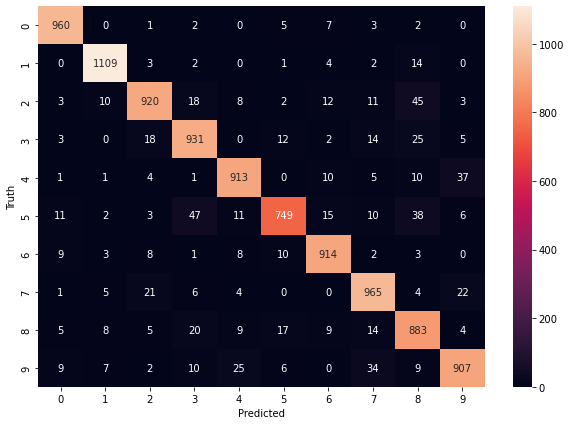

In [33]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [34]:
model = keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])


model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2762 - accuracy: 0.9212
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1258 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0879 - accuracy: 0.9734
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0656 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0524 - accuracy: 0.9837


In [35]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0776 - accuracy: 0.9750


[0.07763271778821945, 0.9750000238418579]

313/313 [==============================] - 0s 1ms/step


Text(69.0, 0.5, 'Truth')

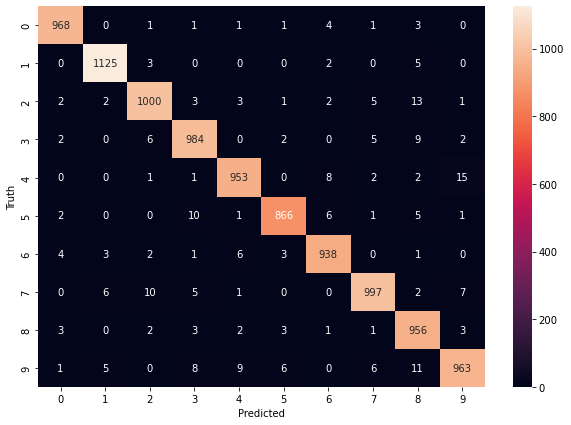

In [36]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [44]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])


tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/adam",histogram_freq=1)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
 
model.fit(X_train,y_train,epochs=5,callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2747 - accuracy: 0.9221
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1248 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0869 - accuracy: 0.9743
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0665 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0537 - accuracy: 0.9833


In [45]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0834 - accuracy: 0.9744


[0.08340643346309662, 0.974399983882904]

313/313 [==============================] - 0s 1ms/step


Text(69.0, 0.5, 'Truth')

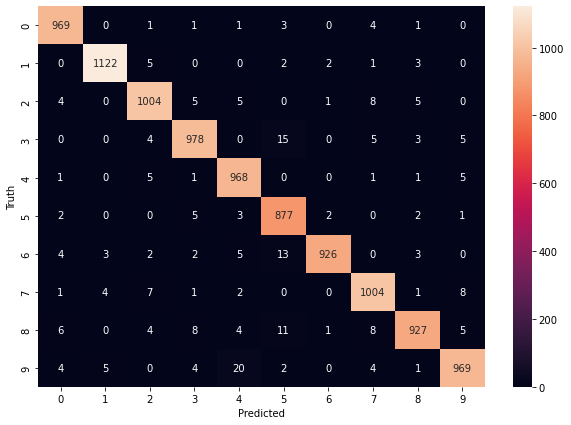

In [46]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d') 
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [42]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])


tb_callback = tf.keras.callbacks.TensorBoard(log_dir="logs/SGD",histogram_freq=1)
model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
 
model.fit(X_train,y_train,epochs=5,callbacks=[tb_callback])

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6457 - accuracy: 0.8362
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3377 - accuracy: 0.9054
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2920 - accuracy: 0.9173
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2633 - accuracy: 0.9262
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2413 - accuracy: 0.9321


# tensorboard --logdir logs/